In [2]:
import pandas as pd
import numpy as np
import torch
import re
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta, date, time
import pickle

In [3]:
#Import Tweets
#df = pd.read_csv('CSVs/tweets_with_hasthags/tweets.csv')
df = pd.read_csv('CSVs/tweets_with_hasthags/tweets.csv', dtype={'author_id': 'str', 'conversation_id': 'str', 'geo': 'str', 'id': 'str', 'text': 'str', 'withheld': 'str', 'retweet_count': 'str', 'reply_count': 'float', 'like_count': 'float', 'quote_count': 'float', 'media_keys': 'str', 'username': 'str' })
#For Testing Purposes shorten to 3 Tweets

In [4]:
#For Oversight delete unused collums
df = df[["created_at", "text", "retweet_count", "reply_count", "like_count", "quote_count", "username"]]
df.head(5)
#df

,created_at,text,retweet_count,reply_count,like_count,quote_count,username
0,2022-06-10 08:39:12+00:00,@fischerdata @FutureOmas @FFFMapCount Thank yo...,0,0.0,0.0,0.0,twiff_bot
1,2022-06-06 00:12:23+00:00,@JanineClimate @Leyse65081133 @ClimateYamin @T...,0,0.0,2.0,0.0,twiff_bot
2,2022-06-05 09:12:53+00:00,"HiIamTwiffbot\nI am sorry, your location is no...",1,1.0,2.0,0.0,twiff_bot
3,2022-06-05 07:37:51+00:00,@JanineClimate @Ros_Rodriguez_ @DoemenR @FFF_S...,1,0.0,5.0,0.0,twiff_bot
4,2022-06-05 07:37:50+00:00,@JanineClimate @Leyse65081133 @ClimateYamin @T...,0,1.0,4.0,0.0,twiff_bot


In [5]:
#Standard Infos
print(df.count())

created_at       1000346
text             1000346
retweet_count     911972
reply_count       911960
like_count        911960
quote_count       911960
username          911960
dtype: int64


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000356 entries, 0 to 1000355
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   created_at     1000346 non-null  object 
 1   text           1000346 non-null  object 
 2   retweet_count  911972 non-null   object 
 3   reply_count    911960 non-null   float64
 4   like_count     911960 non-null   float64
 5   quote_count    911960 non-null   float64
 6   username       911960 non-null   object 
dtypes: float64(3), object(4)
memory usage: 53.4+ MB
None


In [7]:
#Duplicate weg
df[df.duplicated(keep=False)]

,created_at,text,retweet_count,reply_count,like_count,quote_count,username
79425,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146805,2021-09-24 09:09:27+00:00,Das Klimaschutzdebakel im Wahlkampf: Warum kan...,NaN,NaN,NaN,NaN,NaN
146806,2021-09-24 09:09:27+00:00,Das Klimaschutzdebakel im Wahlkampf: Warum kan...,NaN,NaN,NaN,NaN,NaN
146807,2021-09-24 09:09:27+00:00,Das Klimaschutzdebakel im Wahlkampf: Warum kan...,NaN,NaN,NaN,NaN,NaN
146808,2021-09-24 09:09:27+00:00,Das Klimaschutzdebakel im Wahlkampf: Warum kan...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
589822,2019-12-22 11:54:48+00:00,WUNDerBlokK GGUltras so geht Klimaschutz in B...,NaN,NaN,NaN,NaN,NaN
589823,2019-12-22 11:54:48+00:00,WUNDerBlokK GGUltras so geht Klimaschutz in B...,NaN,NaN,NaN,NaN,NaN
814310,NaN,NaN,NaN,NaN,NaN,NaN,NaN
814311,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df.assign(created_at=pd.to_datetime(df['created_at'], errors='coerce'))

In [9]:
df.describe()

,reply_count,like_count,quote_count
count,911960.000000,911960.000000,911960.000000
mean,1.080038,26.865897,0.478338
std,35.763727,687.774277,14.153499
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000
75%,0.000000,4.000000,0.000000
max,28959.000000,270885.000000,7462.000000


In [10]:
df['Time'] = pd.to_datetime(df['created_at']).dt.time
df['Day'] = pd.to_datetime(df['created_at']).dt.date
df["Day"]= pd.to_datetime(df["Day"])
df["Weekday"]= pd.to_datetime(df["created_at"]).dt.dayofweek
df["Hour"] = pd.to_datetime(df["created_at"]).dt.hour
df["Month"]= pd.to_datetime(df["created_at"]).dt.month
df

,created_at,text,retweet_count,reply_count,like_count,quote_count,username,Time,Day,Weekday,Hour,Month
0,2022-06-10 08:39:12+00:00,@fischerdata @FutureOmas @FFFMapCount Thank yo...,0,0.0,0.0,0.0,twiff_bot,08:39:12,2022-06-10,4.0,8.0,6.0
1,2022-06-06 00:12:23+00:00,@JanineClimate @Leyse65081133 @ClimateYamin @T...,0,0.0,2.0,0.0,twiff_bot,00:12:23,2022-06-06,0.0,0.0,6.0
2,2022-06-05 09:12:53+00:00,"HiIamTwiffbot\nI am sorry, your location is no...",1,1.0,2.0,0.0,twiff_bot,09:12:53,2022-06-05,6.0,9.0,6.0
3,2022-06-05 07:37:51+00:00,@JanineClimate @Ros_Rodriguez_ @DoemenR @FFF_S...,1,0.0,5.0,0.0,twiff_bot,07:37:51,2022-06-05,6.0,7.0,6.0
4,2022-06-05 07:37:50+00:00,@JanineClimate @Leyse65081133 @ClimateYamin @T...,0,1.0,4.0,0.0,twiff_bot,07:37:50,2022-06-05,6.0,7.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1000351,2018-10-28 09:50:14+00:00,School Strike https:tconXSNZ5M5Ct,0,0.0,0.0,0.0,MAalburywodonga,09:50:14,2018-10-28,6.0,9.0,10.0
1000352,2018-10-27 22:18:29+00:00,@gruenradikal @Ende__Gelaende Solidarity from ...,2,0.0,11.0,0.0,earth1stLinda,22:18:29,2018-10-27,5.0,22.0,10.0
1000353,2018-10-27 09:18:54+00:00,@GretaThunberg Standing with you in solidarity...,0,0.0,2.0,0.0,earth1stLinda,09:18:54,2018-10-27,5.0,9.0,10.0
1000354,2018-10-27 00:14:07+00:00,"I dont want 2 sound alarmists, but dont you th...",4,0.0,7.0,0.0,earth1stLinda,00:14:07,2018-10-27,5.0,0.0,10.0


Text(0, 0.5, 'Tweets')

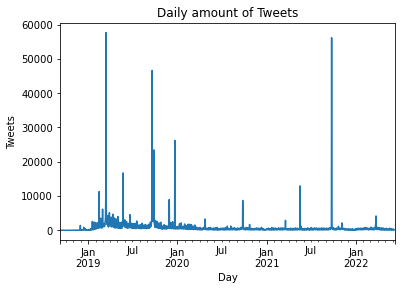

In [11]:
tpd = df.pivot_table("text", aggfunc='count', index="Day" )
ax = tpd.plot(title ="Daily amount of Tweets", legend=False)
ax.set_xlabel("Day")
ax.set_ylabel("Tweets")

In [12]:
tpd_sorted = tpd.sort_values(by="text")

In [13]:
tpd_sorted.tail(10)

,text
Day,
2019-03-16,9000
2019-03-14,9456
2019-02-15,11298
2021-05-18,12944
2019-05-24,16736
2019-09-27,23442
2019-12-22,26223
2019-09-20,46618
2021-09-24,56160


# Die 10 Tage mit den meisten Tweets
https://prnt.sc/RA9iP64G8N7n
### 15.03.2019
Globaler Klimastreik (https://fridaysforfuture.de/march15th/)"

Am 15. März 2019 riefen die Organisatoren der Klimabewegung Fridays for Future zu einem globalen Klimastreik (Global Climate Strike For Future) auf, der auf die weltweit verfehlte Klimapolitik aufmerksam machen sollte. Nach Angaben der Organisatoren nahmen an diesem Streik knapp **2,3 Millionen Menschen in rund 2.400 Städten in über 130 Staaten teil**" (Quelle: https://de.statista.com/statistik/daten/studie/1064670/umfrage/kennzahlen-zum-1-globalen-klima-streik/).

### 24.09.2021
Globaler Klimastreik "AlleFürsKlima"
**"mehr als 620.000 Menschen in ganz Deutschland"** (Quelle: https://www.tagesschau.de/inland/innenpolitik/klimastreik-fridaysforfuture-101.html)

### 20.09.2019
"Am Freitag, 20.9.2019 fand der dritte globale Klimastreik von „Fridays for Future“ statt (Quelle: https://www.fr.de/politik/klimastreik-demos-freitag-2092019-millionen-fridays-future-zr-13012060.html).
"**In Berlin alleine ... 270.000 Menschen"** (Quelle: https://www.zeit.de/politik/2019-09/klimastreik-fridays-for-future-klimaschutz-live).
"**mit weltweit rund vier Millionen Teilnehmern**" (Quelle: https://www.faz.net/aktuell/politik/ausland/klimastreik-globale-fridays-for-future-demos-gehen-weiter-16406182.html)

### 22.12.2019
"Das niederländisches Verfassungsgericht verpflichtet die Regierung zu stärkerer Reduzierung von Emissionen. Klimaschützer feiern das Urteil als historischen Sieg" (Quelle: https://www.faz.net/aktuell/politik/ausland/den-haag-unter-zugzwang-richter-machen-klimaschutzpolitik-16549505.html).

### 27.09.2019
normaler Klimastreik eine Woche nach dem riesiegen globalen Klimastreik (Quelle: https://www.faz.net/aktuell/politik/ausland/klimastreik-globale-fridays-for-future-demos-gehen-weiter-16406182.html)
Nord Stream 2 verklagt EU (Quelle: https://www.faz.net/aktuell/wirtschaft/nord-stream-2-verklagt-eu-wegen-diskriminierung-16406587.html)
Greta Thunberg trifft Justin Trudeau (Quelle: https://www.spiegel.de/politik/ausland/greta-thunberg-trifft-justin-trudeau-er-tut-nicht-genug-a-1289092.html)

### 24.05.2019
GLOBALER KLIMASTREIK ZUR EUROPAWAHL 2019. Vom 23. bis zum 26. Mai 2019 finden Europawahlen statt. In Deutschland wird am 26. Mai gewählt. (Quelle: https://fridaysforfuture.de/24mai/; https://de.wikipedia.org/wiki/Europawahl_2019)

### 18.05.2021
Diskussion Tempolimit nach Laschet-Interview (Quelle: https://www.tagesschau.de/faktenfinder/streit-tempolimit-101.html)

### 15.02.2019
Diskussion über "hart durchgreifen" bei Strekenden Schülern (Quelle: https://www.spiegel.de/lebenundlernen/schule/schueler-streiken-fuer-klima-ministerium-in-nrw-will-hart-durchgreifen-a-1253529.html)

### 14.03.2019
Ein Tag vor dem riesigen Klimastreik am 15.03.2019


### 16.03.2019
Ein Tag nach dem riesigen Klimastreik am 15.03.2019
